https://www.hackerearth.com/de/practice/machine-learning/machine-learning-projects/python-project/tutorial/

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from scipy.stats import norm,skew

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [381]:
train_data.shape

(1456, 80)

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Check for null values

In [8]:
train_data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [9]:
train_data.columns[train_data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

### Percentage of null values

In [14]:
null_vals = train_data.isnull().sum()/len(train_data)

In [16]:
null_vals

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [19]:
null_vals[null_vals>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [20]:
null_details = null_vals[null_vals>0]

In [21]:
type(null_details)

pandas.core.series.Series

In [22]:
null_df = pd.DataFrame(null_details)

In [23]:
null_df

,0
LotFrontage,0.177397
Alley,0.937671
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685


In [40]:
null_df.columns = ['vals']

In [42]:
null_df

,vals
LotFrontage,0.177397
Alley,0.937671
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685


In [43]:
null_df.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [44]:
null_df.values

array([[1.77397260e-01],
       [9.37671233e-01],
       [5.47945205e-03],
       [5.47945205e-03],
       [2.53424658e-02],
       [2.53424658e-02],
       [2.60273973e-02],
       [2.53424658e-02],
       [2.60273973e-02],
       [6.84931507e-04],
       [4.72602740e-01],
       [5.54794521e-02],
       [5.54794521e-02],
       [5.54794521e-02],
       [5.54794521e-02],
       [5.54794521e-02],
       [9.95205479e-01],
       [8.07534247e-01],
       [9.63013699e-01]])

In [45]:
vals = null_df.values
np.ravel(vals)

array([1.77397260e-01, 9.37671233e-01, 5.47945205e-03, 5.47945205e-03,
       2.53424658e-02, 2.53424658e-02, 2.60273973e-02, 2.53424658e-02,
       2.60273973e-02, 6.84931507e-04, 4.72602740e-01, 5.54794521e-02,
       5.54794521e-02, 5.54794521e-02, 5.54794521e-02, 5.54794521e-02,
       9.95205479e-01, 8.07534247e-01, 9.63013699e-01])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

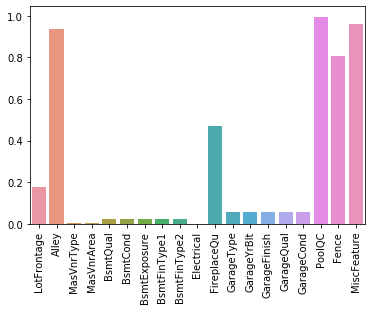

In [46]:
sns.barplot(x=null_df.index,y = np.ravel(vals) )
plt.xticks(rotation=90)

In [48]:
null_df.sort_values(by='vals',inplace=True)

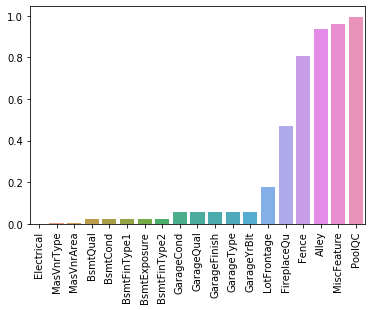

In [51]:
sns.barplot(x=null_df.index,y = np.ravel(null_df.values))
plt.xticks(rotation=90);

## EDA

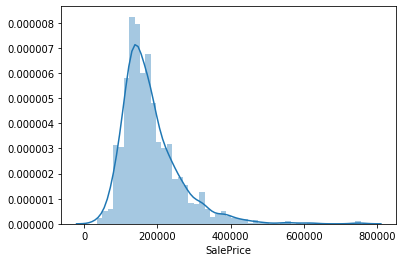

In [52]:
sns.distplot(train_data['SalePrice'])

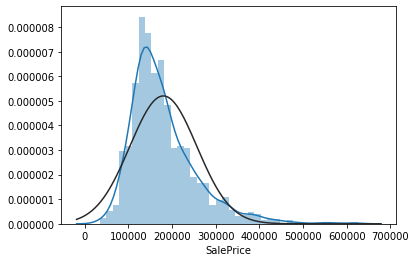

In [231]:
sns.distplot(train_data['SalePrice'] , fit=norm)

In [233]:
(mu, sigma) = norm.fit(train_data['SalePrice'])
print(mu,sigma)

180151.2335164835 76670.24989058504


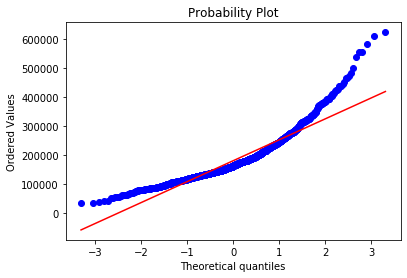

In [235]:
res = stats.probplot(train_data['SalePrice'], plot=plt)


### skewness

In [54]:
train_data['SalePrice'].skew()

1.8828757597682129

## log transform

In [55]:
target = np.log(train_data['SalePrice'])

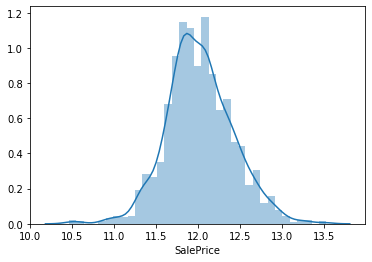

In [56]:
sns.distplot(target)

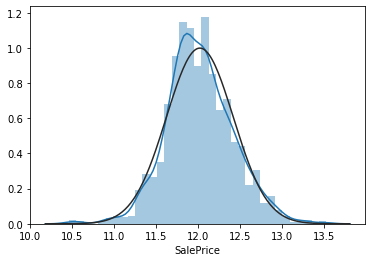

In [236]:
sns.distplot(target,fit=norm) 

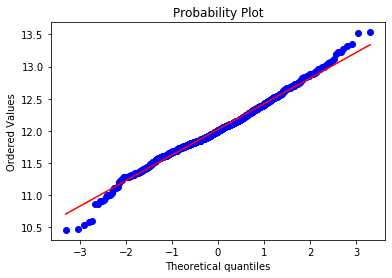

In [237]:
res = stats.probplot(target, plot=plt)

In [61]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [63]:
train_data.drop(['Id'],axis=1,inplace=True)

In [64]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [277]:
test_data.drop(['Id'],axis=1,inplace=True)

## numeric data vs categorical data

In [65]:
numeric_data = train_data.select_dtypes(include=[np.number])

In [66]:
categ_data = train_data.select_dtypes(exclude=[np.number])

In [67]:
numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [68]:
categ_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Numerical data

## Correlation

In [70]:
correl_data = numeric_data.corr()

In [71]:
correl_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


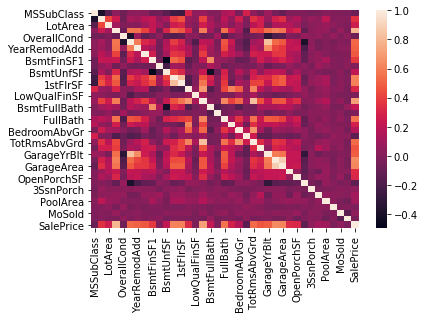

In [72]:
sns.heatmap(correl_data)

### correlation with output

In [75]:
correl_data['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Verify the column with max correlation

In [76]:
train_data['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

OverallQual scale of 1 to 10

In [79]:
train_data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

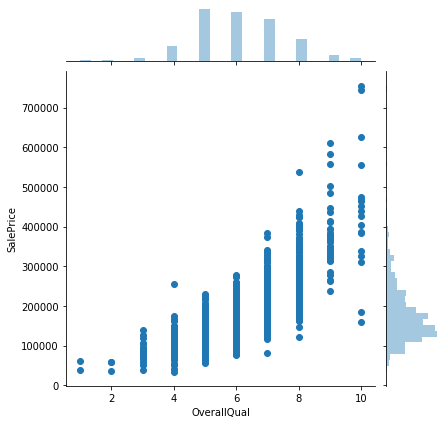

In [94]:
sns.jointplot(train_data['OverallQual'],train_data['SalePrice'])

The output (SalePrice) as seen is skewed, hence we take median Saleprice for each of the OverallQual

In [80]:
pivot = train_data.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)

In [81]:
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


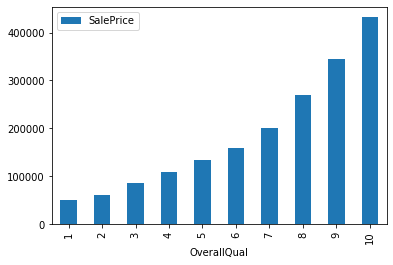

In [86]:
pivot.plot(kind='bar')

## Next correlated value

In [87]:
train_data['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [90]:
train_data['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

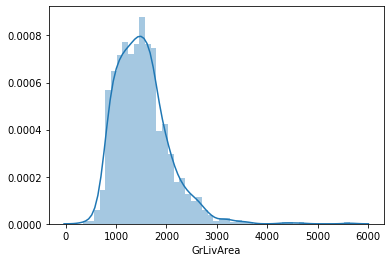

In [91]:
sns.distplot(train_data['GrLivArea'])

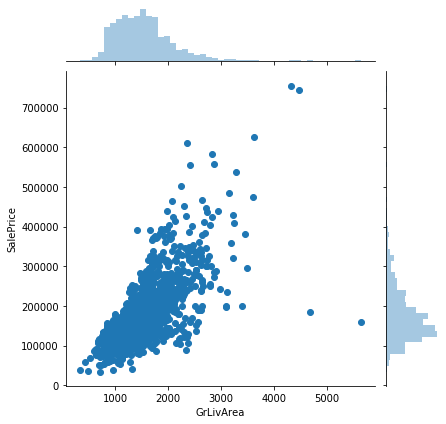

In [93]:
sns.jointplot(train_data['GrLivArea'],train_data['SalePrice'])

Outliers are at 4000, these are to be removed to avoid the outliers in the prediction

In [ ]:
train_data.drop(train_data[train_data['GrLivArea']>4000].index)

In [97]:
train_data.drop(train_data[train_data['GrLivArea']>4000].index,inplace=True)

Numerical data plotting all at once to check for skewness in all the columns

#### Distplot to check for the skewness in numerical data

In [202]:
nm_data = train_data.select_dtypes(include=[np.number])


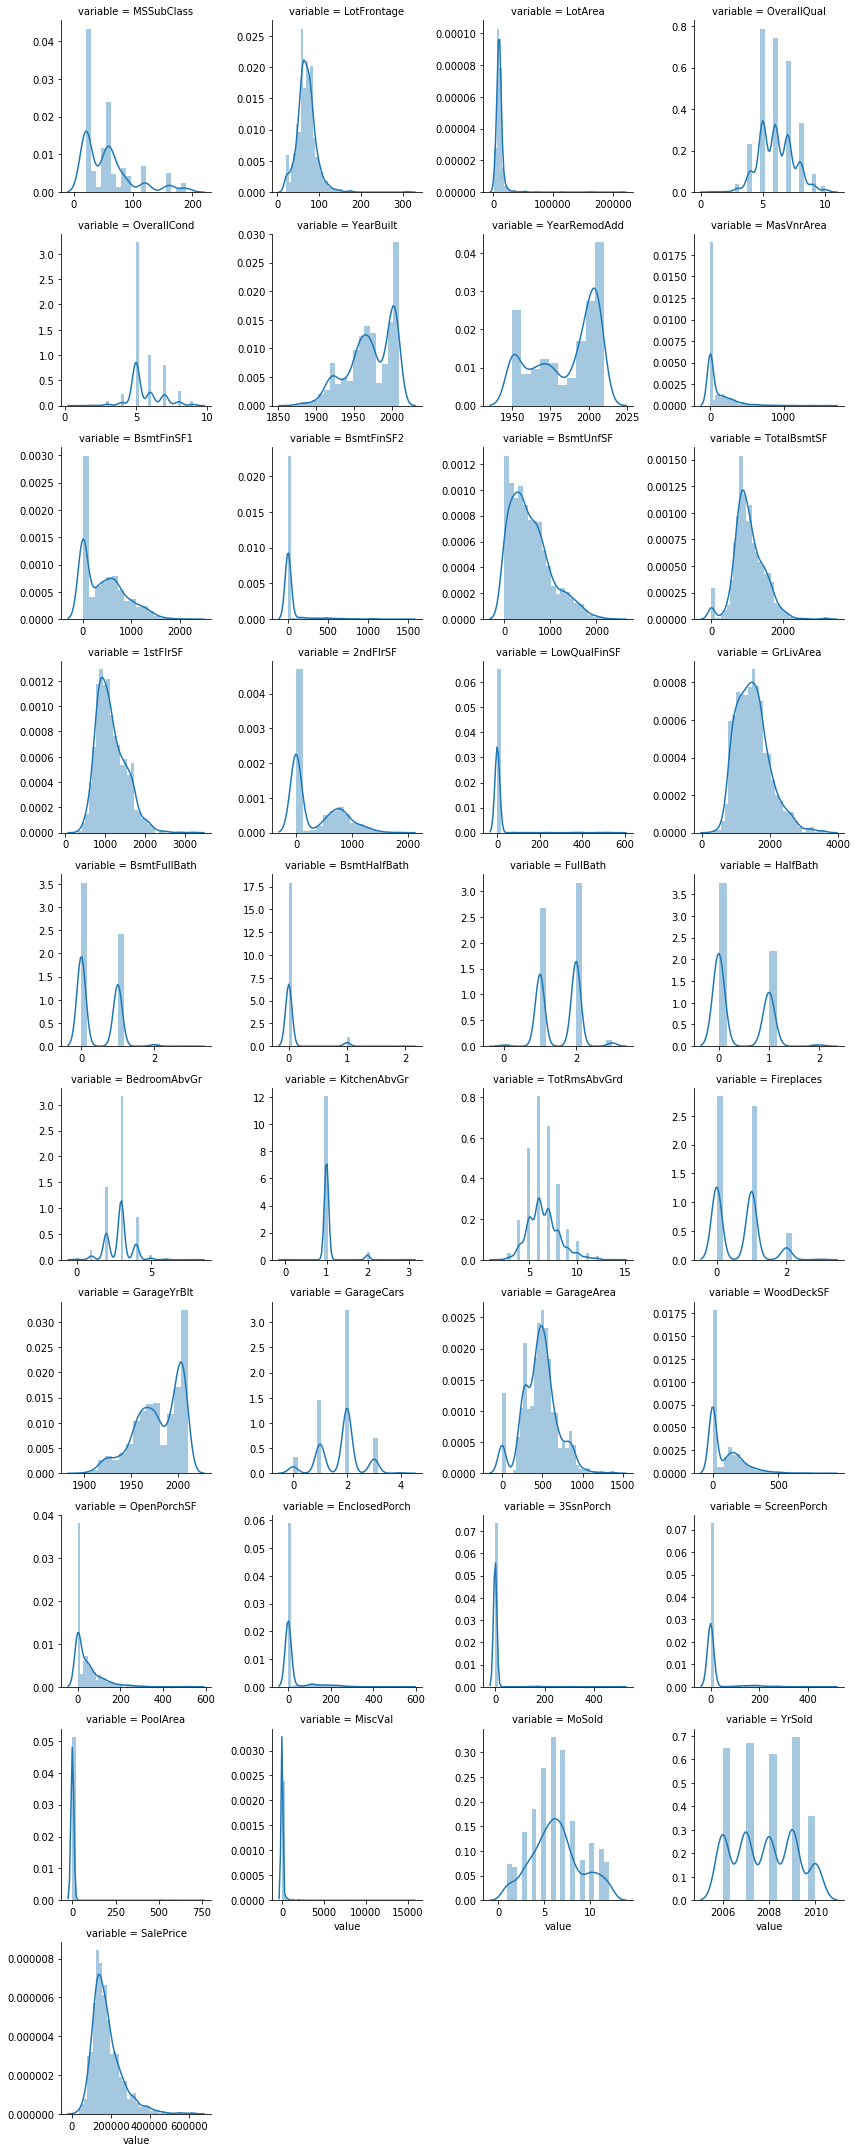

In [203]:
#create numeric plots
num = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
nd = pd.melt(train_data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

## Categorical data

In [98]:
categ_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## ANOVA

Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them. 

While using ANOVA, our hypothesis is as follows:

Ho - There exists no significant difference between the groups. Ha - There exists a significant difference between the groups.

Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price. 

In [152]:
original_categ_data = train_data.select_dtypes(exclude=[np.number])

### creating the categ_data again because we have dropped a few values above

In [153]:
original_categ_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas

In [154]:
categ_data = categ_data.copy()



To compare categ_data values with SalePrice, add saleprice as one of the column

In [155]:
categ_data['SalePrice'] = train_data.SalePrice.values

In [148]:
categ_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [156]:
original_categ_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [157]:
original_categ_data.columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [158]:
cat_vals = original_categ_data.columns.values
anv = pd.DataFrame()
anv['features']=cat_vals

In [159]:
anv

,features
0,MSZoning
1,Street
2,Alley
3,LotShape
4,LandContour
5,Utilities
6,LotConfig
7,LandSlope
8,Neighborhood
9,Condition1


These are different categorical columns.. select unique values in each categorical column

In [191]:
original_categ_data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [161]:
original_categ_data['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

Find the set of rows for each of the unique value in each category column

In [193]:
original_categ_data['Neighborhood'].unique()[0]

'CollgCr'

In [194]:
original_categ_data[original_categ_data['Neighborhood']==original_categ_data['Neighborhood'].unique()[0]]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
13,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial
22,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
32,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1422,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1441,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1444,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


But the SalePrice is in the categ_data dataframe, so we use that from here on

In [195]:
categ_data[categ_data['Neighborhood']==categ_data['Neighborhood'].unique()[0]]['SalePrice']

0       208500
2       223500
13      279500
22      230000
32      179900
         ...  
1410    230000
1422    136500
1441    149300
1444    179600
1447    240000
Name: SalePrice, Length: 150, dtype: int64

In [196]:
s1 = categ_data[categ_data['Neighborhood']==categ_data['Neighborhood'].unique()[0]]['SalePrice'].values

In [197]:
s2 = categ_data[categ_data['Neighborhood']==categ_data['Neighborhood'].unique()[1]]['SalePrice'].values

In [198]:
s1.tolist().append(s2.tolist())

In [199]:
s1

array([208500, 223500, 279500, 230000, 179900, 145000, 130250, 196500,
       124900, 219500, 226000, 123600, 204750, 214000, 198900, 383970,
       163990, 230000, 231500, 260000, 204000, 122000, 192000, 127000,
       149000, 156000, 161750, 210000, 204900, 128200, 185500, 180000,
       220000, 231500, 276000, 233230, 267000, 205000, 149900, 305900,
       214000, 177500, 219500, 148000, 213500, 191000, 123000, 164990,
       195400, 212000, 210000, 124000, 208900, 297000, 211000, 188000,
       272000, 185900, 140000, 110000, 221000, 152000, 313000, 261500,
       191000, 173500, 285000, 141000, 213000, 128500, 143000, 194500,
       222500, 190000, 217000, 212000, 216837, 221500, 187100, 189000,
       144500, 224900, 183000, 237000, 144000, 133500, 131500, 147000,
       200500, 136500, 143500, 236500, 190000, 239799, 192500, 133900,
       185000, 239000, 255900, 173900, 206000, 149900, 203000, 194000,
       112500, 230000, 287000, 145000, 200141, 255000, 194000, 155900,
      

In [200]:
stats.f_oneway(s1)

F_onewayResult(statistic=nan, pvalue=nan)

/home/sireesha/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


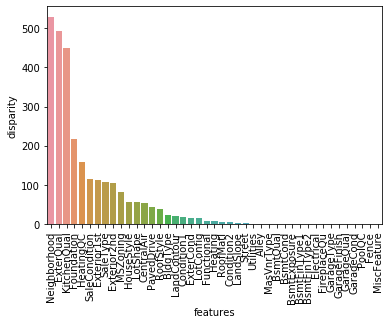

In [174]:
cat = [f for f in train_data.columns if train_data.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

categ_data['SalePrice'] = train_data.SalePrice.values
k = anova(categ_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90);

#### Box plot for categorical data to check for outliers

/home/sireesha/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


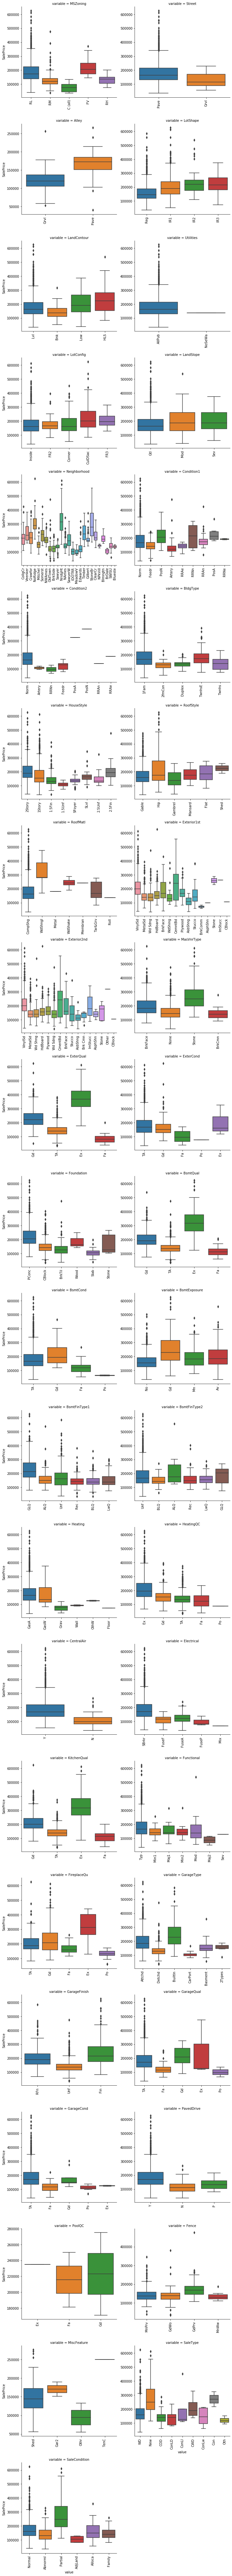

In [204]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train_data.columns if train_data.dtypes[f] == 'object']

p = pd.melt(train_data, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

There are outliers, tree-based algorithms are usually robust to outliers. 

## Data processing

#### making skew data logtransformed as the saleprice output

In [238]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

In [279]:
train_data.shape

(1456, 80)

In [278]:
test_data.shape

(1459, 79)

Training and testing data is to be combined for data processing

In [301]:
comb_data = train_data.append(test_data)
comb_data.shape

(2915, 80)

### Remove output variable from feature engineering

In [302]:
comb_data.drop(['SalePrice'],axis=1,inplace=True)

In [303]:
comb_data.shape

(2915, 79)

#### check for the missing data 

In [304]:
comb_null = comb_data.isnull().sum()/len(comb_data)

In [305]:
comb_null1 = comb_null[comb_null>0]

In [306]:
comb_null1= comb_null1.sort_values(ascending=False)

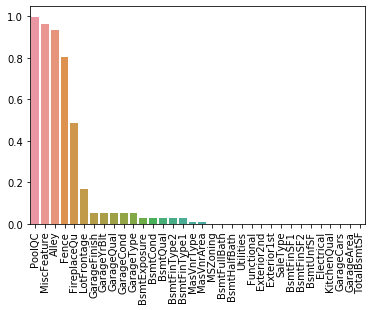

In [307]:
sns.barplot(x=comb_null1.index,y=comb_null1.values)
plt.xticks(rotation=90);

In [308]:
comb_null1

PoolQC          0.997256
MiscFeature     0.963979
Alley           0.932075
Fence           0.804460
FireplaceQu     0.487136
LotFrontage     0.166724
GarageFinish    0.054545
GarageYrBlt     0.054545
GarageQual      0.054545
GarageCond      0.054545
GarageType      0.053859
BsmtExposure    0.028130
BsmtCond        0.028130
BsmtQual        0.027787
BsmtFinType2    0.027444
BsmtFinType1    0.027101
MasVnrType      0.008233
MasVnrArea      0.007890
MSZoning        0.001372
BsmtFullBath    0.000686
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

In [309]:
num_comb = comb_data.select_dtypes(include=[np.number])

In [310]:
num_null = num_comb.isnull().sum()/len(num_comb)

In [311]:
num_null1 = num_null[num_null>0]

In [312]:
num_null1.sort_values(ascending=False)

LotFrontage     0.166724
GarageYrBlt     0.054545
MasVnrArea      0.007890
BsmtHalfBath    0.000686
BsmtFullBath    0.000686
GarageArea      0.000343
GarageCars      0.000343
TotalBsmtSF     0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
dtype: float64

In [313]:
cat_comb = comb_data.select_dtypes(exclude=[np.number])

In [314]:
cat_null = cat_comb.isnull().sum()/len(cat_comb)

In [315]:
cat_null1 = cat_null[cat_null>0]

In [316]:
cat_null1.sort_values(ascending=False)

PoolQC          0.997256
MiscFeature     0.963979
Alley           0.932075
Fence           0.804460
FireplaceQu     0.487136
GarageCond      0.054545
GarageQual      0.054545
GarageFinish    0.054545
GarageType      0.053859
BsmtExposure    0.028130
BsmtCond        0.028130
BsmtQual        0.027787
BsmtFinType2    0.027444
BsmtFinType1    0.027101
MasVnrType      0.008233
MSZoning        0.001372
Functional      0.000686
Utilities       0.000686
Exterior1st     0.000343
SaleType        0.000343
Exterior2nd     0.000343
KitchenQual     0.000343
Electrical      0.000343
dtype: float64

### Null values of categorical data

PoolQC -- NA is no pool

MiscFeature : data description says NA means "no misc feature"



Alley : data description says NA means "no alley access"



Fence: data description says NA means "no fence"

FireplaceQu : data description says NA means "no fireplace"



GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None



In [326]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType',):
    comb_data[col] = comb_data[col].fillna('None')

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [328]:
comb_data['MSZoning'].value_counts()

RL         2261
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [329]:
comb_data['MSZoning'] = comb_data['MSZoning'].fillna(comb_data['MSZoning'].mode()[0])

In [330]:
comb_data['Utilities'].value_counts()

AllPub    2912
NoSeWa       1
Name: Utilities, dtype: int64

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. 

In [331]:
comb_data.drop(['Utilities'],axis=1,inplace=True)

Functional : data description says NA means typical

In [332]:
comb_data['Functional'] = comb_data['Functional'].fillna('Typ')

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [333]:
comb_data['Electrical'].value_countscounts()

SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [334]:
comb_data['Electrical'] = comb_data['Electrical'].fillna(comb_data['Electrical'].mode()[0])

Similarly, KitchenQual, Exterior1st and Exterior2nd, SaleType replaced with most frequent values

In [335]:
for col in ('KitchenQual', 'Exterior1st', 'Exterior2nd','SaleType'):
    comb_data[col] = comb_data[col].fillna(comb_data[col].mode()[0])

In [336]:
cat_comb = comb_data.select_dtypes(exclude=[np.number])

cat_null = cat_comb.isnull().sum()/len(cat_comb)

cat_null1 = cat_null[cat_null>0]

cat_null1.sort_values(ascending=False)

Series([], dtype: float64)

No null values in categorical data 

Next dealing with null values in numerical data

In [337]:
num_null1.sort_values(ascending=False)

LotFrontage     0.166724
GarageYrBlt     0.054545
MasVnrArea      0.007890
BsmtHalfBath    0.000686
BsmtFullBath    0.000686
GarageArea      0.000343
GarageCars      0.000343
TotalBsmtSF     0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
dtype: float64

In [339]:
comb_data['LotFrontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
119.0      1
195.0      1
133.0      1
126.0      1
Name: LotFrontage, Length: 128, dtype: int64

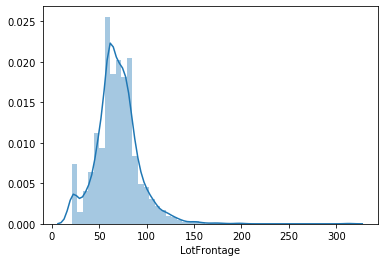

In [340]:
sns.distplot(comb_data['LotFrontage'])

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
    
    Because of skewness we fill it with median

In [343]:
comb_data.groupby("Neighborhood")["LotFrontage"].value_counts()

Neighborhood  LotFrontage
Blmngtn       43.0           12
              53.0            7
              51.0            1
Blueste       24.0            7
              35.0            3
                             ..
Veenker       94.0            1
              95.0            1
              100.0           1
              103.0           1
              110.0           1
Name: LotFrontage, Length: 754, dtype: int64

In [346]:
comb_data["LotFrontage"] = comb_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Filling other columns with 0

In [345]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath','MasVnrArea'):
    comb_data[col] = comb_data[col].fillna(0)

In [347]:
num_comb = comb_data.select_dtypes(include=[np.number])

num_null = num_comb.isnull().sum()/len(num_comb)

num_null1 = num_null[num_null>0]

num_null1.sort_values(ascending=False)

Series([], dtype: float64)

#### Check for overall null values

In [348]:
comb_null = comb_data.isnull().sum()/len(comb_data)

comb_null1 = comb_null[comb_null>0]

comb_null1.sort_values(ascending=False)

Series([], dtype: float64)

## Encoding categorical data

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
le = LabelEncoder()

In [350]:
comb_data.select_dtypes(exclude=[np.number]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
Transforming some numerical variables that are really categorical

In [351]:
#MSSubClass=The building class
comb_data['MSSubClass'] = comb_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
comb_data['OverallCond'] = comb_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
comb_data['YrSold'] = comb_data['YrSold'].astype(str)
comb_data['MoSold'] = comb_data['MoSold'].astype(str)

 Variable names which have 'quality' or 'qual' in their names can be treated as ordinal variables, as mentioned above. Now, we'll convert the categorical variables into ordinal variables. 

In [352]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [355]:
for c in cols:
    le = LabelEncoder() 
    le.fit(list(comb_data[c].values)) 
    comb_data[c] = le.transform(list(comb_data[c].values))

## Skewed features


In [356]:
num_comb = comb_data.select_dtypes(include=[np.number])


In [363]:
num_comb.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

### Check the skew of all numerical features

In [ ]:
from scipy.stats import norm, skew #for some statistics

In [366]:
comb_data[num_comb.columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
LandSlope         4.971350
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.942892
MasVnrArea        2.600697
OpenPorchSF       2.529245
WoodDeckSF        1.848285
1stFlrSF          1.253011
LotFrontage       1.092709
GrLivArea         0.977860
BsmtFinSF1        0.974138
BsmtUnfSF         0.920135
2ndFlrSF          0.843237
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.662657
BsmtFullBath      0.622820
OverallCond       0.569143
HeatingQC         0.484412
FireplaceQu       0.338202
BedroomAbvGr      0.328129
GarageArea        0.217748
OverallQual       0.181902
FullBath          0.159917
MSSubClass        0.141024
YrSold            0.130909
BsmtFinType1      0.082649
GarageCars       -0.219402
YearRemodAdd     -0.449113
B

In [368]:
skew_ft = comb_data[num_comb.columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [369]:
skew_df = pd.DataFrame({'Skew' :skew_ft})

In [376]:
skew_df[abs(skew_df)>0.75].shape

(58, 1)

#### Box Cox Transformation of (highly) skewed features


In [377]:
skew_df = skew_df[abs(skew_df) > 0.75]

In [378]:
from scipy.special import boxcox1p
skewed_features = skew_df.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    comb_data[feat] = boxcox1p(comb_data[feat], lam)

### Dummy data

In [380]:
comb_data = pd.get_dummies(comb_data)


In [386]:
comb_data.shape

(2915, 219)

In [387]:
train_data.shape

(1456, 80)

In [388]:
test_data.shape

(1459, 79)

## Separating training and testing data

In [382]:
comb_data[:train_data.shape[0]]

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.885846,5.744420,18.960528,0.730463,0.730463,1.540963,0.0,2.259674,1.820334,14.181278,...,0,0,0,1,0,0,0,0,1,0
1456,2.055642,6.337529,20.994868,0.730463,0.730463,1.540963,0.0,2.259674,2.055642,14.148295,...,0,0,0,1,0,0,0,0,1,0
1457,3.011340,5.859551,19.476345,0.730463,0.730463,1.540963,0.0,2.440268,2.602594,14.089451,...,0,0,0,1,0,0,0,0,1,0
1458,2.055642,5.914940,19.760176,0.730463,0.730463,1.540963,0.0,2.055642,2.055642,14.103852,...,0,0,0,1,0,0,0,0,1,0


In [384]:
new_train = comb_data[:train_data.shape[0]]

In [385]:
new_test = comb_data[train_data.shape[0]:]

In [389]:
new_train.shape

(1456, 219)

In [390]:
new_test.shape

(1459, 219)

In [391]:
train_data['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1456, dtype: float64

## Modelling

Splitting new_train into X_Train, X_Test further for verifying the model

as test_data does not contain the SalePrice column

In [519]:
X  = new_train.values

In [520]:
y = train_data['SalePrice'].values

In [521]:
from sklearn.model_selection import train_test_split

In [522]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [419]:
X

array([[ 2.88584647,  5.83132789, 19.21218231, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.05564154,  6.22121363, 19.71220478, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.88584647,  5.91494002, 20.34724091, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.01134024,  5.85955121, 19.47634523, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.05564154,  5.91494002, 19.76017576, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.05564154,  6.0986261 , 19.84906344, ...,  0.        ,
         1.        ,  0.        ]])

In [420]:
y

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [421]:
from sklearn.svm import SVR

In [422]:
model = SVR(kernel='linear')

In [423]:
model.fit(X_train,y_train)
model.predict(X_test)


array([11.66037717, 12.19013937, 11.81662006, 11.73291757, 12.32446286,
       12.53377436, 12.38535564, 13.04691433, 11.94233063, 11.71504654,
       11.35304767, 12.16206253, 11.77667283, 12.49310327, 11.37422744,
       12.05327866, 12.28509183, 11.92843562, 12.27161129, 11.92934603,
       12.34096909, 11.84735228, 11.59271521, 11.71035561, 11.86475067,
       12.03948975, 12.00247459, 12.13777442, 12.37254856, 11.90951709,
       11.68658161, 11.54043227, 11.80247571, 11.74895229, 11.36082286,
       11.99866752, 11.90968313, 11.44490491, 12.53311413, 11.59526552,
       11.95647986, 11.72532592, 12.16133984, 12.01492337, 11.5418609 ,
       11.22140106, 12.12749201, 12.55824127, 11.88076309, 11.63393485,
       11.58239969, 11.83000279, 12.4617305 , 12.05937165, 12.10833433,
       11.64821507, 11.72854843, 12.28008784, 11.76579594, 11.61062259,
       12.62264601, 11.68972293, 12.28339711, 11.63999709, 12.15650076,
       11.27992088, 11.37712683, 11.98875224, 11.8689683 , 12.09

In [446]:
regressor = ensemble.RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [447]:
regressor.predict(X_test)

array([11.74131392, 12.26595527, 11.83952727, 11.85516276, 12.27891534,
       12.46039122, 12.262879  , 13.12522167, 11.84979847, 11.82311395,
       11.39074449, 12.2328896 , 11.86654418, 12.46844203, 11.68575211,
       12.00028378, 12.33050142, 11.83277178, 12.25351284, 12.02266649,
       12.28745642, 11.77811231, 11.60587939, 11.82025044, 11.87575521,
       12.08838244, 11.99564548, 12.03940781, 12.34708175, 11.74518072,
       11.78378238, 11.57953449, 11.74335399, 11.71481884, 11.40289771,
       12.03528572, 12.03119471, 11.50792617, 12.30045562, 11.67771109,
       11.93255552, 11.81709277, 12.11216399, 12.05529259, 11.72309847,
       11.23393442, 12.09130171, 12.47060134, 11.81487471, 11.66148169,
       11.78048079, 11.90656081, 12.31960445, 12.00255661, 12.05900474,
       11.70012125, 11.75645698, 12.48966936, 11.80750325, 11.49004798,
       12.58028795, 11.68533538, 12.17172736, 11.71520778, 12.1429553 ,
       11.23115834, 11.6262984 , 12.05281255, 11.90694553, 11.99

In [449]:
metrics.mean_squared_error(y_pred,y_test)

0.02899857331263736

In [464]:
from sklearn import svm,linear_model,tree,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process
from xgboost import XGBRegressor 
from sklearn import metrics
from lightgbm import LGBMRegressor

In [523]:
model_func = [
    
    # Ensemble Methods
    ensemble.AdaBoostRegressor(n_estimators=300, random_state=0),
    ensemble.BaggingRegressor(n_estimators=300, random_state=0),
    ensemble.ExtraTreesRegressor(n_estimators=300, random_state=0),
    ensemble.GradientBoostingRegressor(n_estimators=300, random_state=0),
    ensemble.RandomForestRegressor(n_estimators=1200,random_state=0),
    
    
    ## Gaussian Procedure
    gaussian_process.GaussianProcessRegressor(),
    
     #GLM
    linear_model.LassoCV(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.RidgeCV(),
    linear_model.SGDRegressor(),
    linear_model.ElasticNetCV(),
    
    
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    
    #SVM
    svm.SVR(kernel='rbf'),
    svm.SVR(kernel='linear'),
    svm.LinearSVR(),
    
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBRegressor(),    
    
    
    ## LGBM
    LGBMRegressor()
    ]
    


In [524]:
model_cols = ['Model_name','MSE','Accuracy']

comparision_df = pd.DataFrame(columns = model_cols)


In [530]:
row_index = 0
for i in model_func:
    Model_name = i.__class__.__name__
    comparision_df.loc[row_index,'Model_name'] = Model_name
    
    #fiting the model
    i.fit(X_train, y_train)

    #prediction
    y_pred = i.predict(X_test)

    #Accuracy
    comparision_df.loc[row_index,'Accuracy'] = (metrics.r2_score(y_pred,y_test))
    #MSE
    comparision_df.loc[row_index,'MSE'] = (np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
        
    row_index+=1
    
comparision_df.sort_values(by = ['Accuracy'], inplace = True)




/home/sireesha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[16:43:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [533]:
comparision_df.sort_values(by='Accuracy',ascending=False)

,Model_name,MSE,Accuracy
8,RidgeCV,0.11189,0.9095
10,ElasticNetCV,0.113183,0.906565
6,LassoCV,0.113254,0.906449
13,SVR,0.126145,0.890586
3,GradientBoostingRegressor,0.12182,0.888253
7,PassiveAggressiveRegressor,0.13089,0.886084
18,LGBMRegressor,0.122909,0.883212
17,XGBRegressor,0.127409,0.871365
1,BaggingRegressor,0.135726,0.841911
4,RandomForestRegressor,0.136082,0.841058


In [511]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict


In [478]:
cv = KFold(n_splits=5,shuffle=True)

In [515]:
model_cols = ['Model_name','Accuracy','Scores']

comparision_dfCV = pd.DataFrame(columns = model_cols)


In [513]:
row_index = 0
for i in model_func:
    Model_name = i.__class__.__name__
    comparision_dfCV.loc[row_index,'Model_name'] = Model_name
    
    
    mse_vals = []
    scores=[]
    predictions = cross_val_predict(i,new_train, train_data['SalePrice'], cv=6)
    accuracy = metrics.r2_score(train_data['SalePrice'], predictions)
    scores = cross_val_score(i,new_train, train_data['SalePrice'], cv=6)

    #Accuracy
    comparision_dfCV.loc[row_index,'Scores'] = np.mean(scores)
    
    comparision_dfCV.loc[row_index,'Accuracy'] = accuracy
        
    row_index+=1
    
comparision_dfCV.sort_values(by = ['Accuracy'], inplace = True)

/home/sireesha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sireesha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sireesha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sireesha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sireesha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase th

[15:52:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost

In [516]:
comparision_dfCV.sort_values(by='Accuracy',ascending=False)

,Model_name,Accuracy,Scores
